#STATISTICS Analysis



In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import io
import matplotlib as mp
import sys
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sm
import random 
from matplotlib.pyplot import figure
# from lec 5 ַweb - from elections_functions import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
import matplotlib.lines as mlines

In [ ]:
# from labs 1-5

# Add a check if we run in google colab or locally in jupyter notebook
#upload the cities files of 2020 and 2021, the ballot file and eshkolot file.

run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

 # load  files - cities 2020.csv + cities 2021.csv + ballots 2021.csv
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Running on CoLab


Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali (1).xlsx
Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv
Saving votes per city 2020.csv to votes per city 2020 (1).csv
Saving votes per city 2021.csv to votes per city 2021 (1).csv


In [ ]:
df_2021_ballot_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021_ballot_raw = df_2021_ballot_raw.drop('מעטפות חיצוניות')
df_2021_ballot = df_2021_ballot_raw.drop('סמל ועדה', axis=1)
df_2021_ballot = df_2021_ballot[df_2021_ballot.columns[5:-1]]
#df_2021_ballot['בזב'] = df_2021_raw_ballot['בזב']
df_2021_ballot['סמל ישוב'] = df_2021_ballot_raw['סמל ישוב']

df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021.drop('מעטפות חיצוניות')
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
#df_2021['בזב'] = df_2021_raw['בזב']

df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות')
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:-1]]
#df_2020['בזב'] = df_2020_raw['בזב']

df_2021_eshkolot = pd.read_excel(io.BytesIO(uploaded['eshkol_hevrati_calcali.xlsx']), index_col='name')
df_2021_eshkolot.rename(columns={'set_code':'סמל ישוב'}, inplace=True)

In [ ]:
# convert columns with the parties' names:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

df_2021_ballot.rename(columns=parties_dict_2021, inplace=True)
df_2021.rename(columns=parties_dict_2021, inplace=True)


parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

df_2020.rename(columns=parties_dict_2020, inplace=True)

In [ ]:
parties = list(parties_dict_2021.values())

##1A

In [ ]:
#creating a merged data frame from lab 4

merged_data = df_2021_ballot.join(df_2021_eshkolot.set_index('סמל ישוב'), on='סמל ישוב')
merged_data = merged_data.dropna()

In [ ]:
pca = PCA(n_components=2) 

merged_pca = merged_data[parties]

merged_pca_normalization = normalize(merged_pca, axis=0)

Y = pca.fit_transform(merged_pca_normalization.T)

Y = normalize(Y, axis=0)

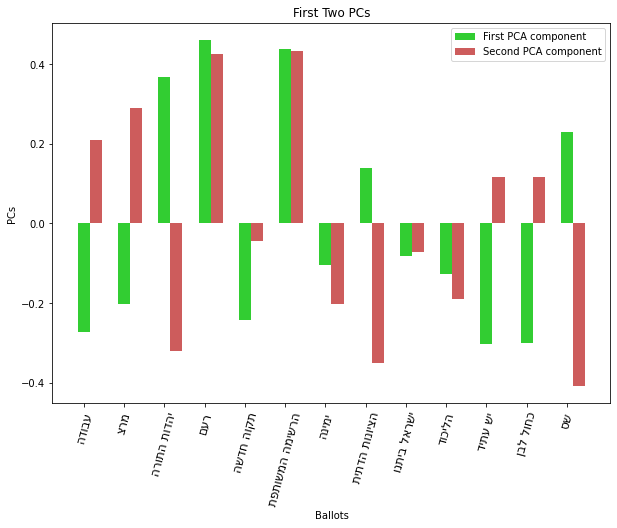

In [ ]:
rev_names = [party[::-1] for party in parties]
fig, ax = plt.subplots(figsize=(10,7))

Y0 = ax.bar(np.arange(len(Y)),Y[:,0],width=0.3,color='limegreen')
Y1 = ax.bar(np.arange(len(Y))+0.3,Y[:,1],width=0.3,color='indianred')

ax.set_ylabel('PCs')
ax.set_xlabel('Ballots')
ax.set_title('First Two PCs')
ax.set_xticks(np.arange(len(Y)))
ax.set_xticklabels(rev_names,rotation=75,size= 12)
ax.legend(['First PCA component','Second PCA component'])
plt.show()

המפלגות על שני קצוות הספקטרום הפוליטי דומיננטיות יותר בשני הגורמים הראשונים, כאשר המפלגות הערביות חיוביות בשני הגורמים, והמפלגות הדתיות חיוביות בגורם הראשון ושליליות בגורם השני.

##1B

Text(0.5, 1.0, 'Explained Variance')

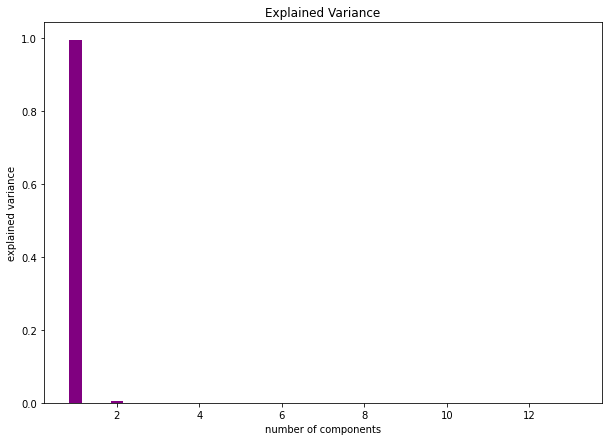

In [ ]:
pca = PCA(n_components=13)  # define PCA object
f, ax = plt.subplots(figsize=(10,7))
Z = pca.fit_transform(df_2021_ballot.T)  # fit model. Compute principal components
plt.bar(np.arange(1,14), pca.explained_variance_/sum(pca.explained_variance_),width=0.3,color='purple') 
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Explained Variance')

Text(0.5, 1.0, 'Cumulative Explained Variance')

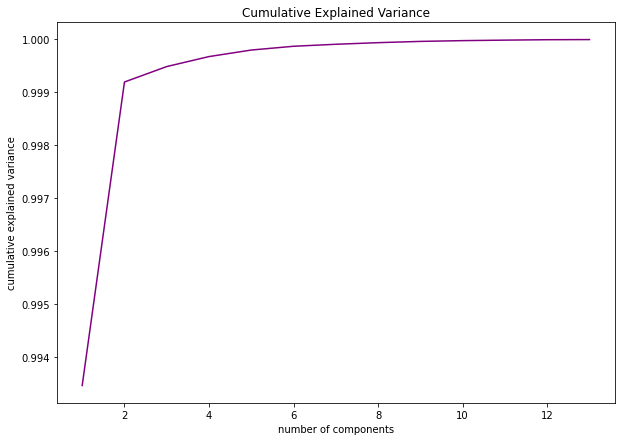

In [ ]:
f, ax = plt.subplots(figsize=(10,7))
plt.plot(np.arange(1,14),np.cumsum(pca.explained_variance_ratio_),color='purple')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance')

בהמשך לניתוח התרשימים, נמליץ נמליץ להוריד את הנתונים למימד אחד. בהתחם למקסימום של הערך אותו קיבלנו בניתוח השונות המוסברת המצטברת

##2A

In [ ]:
# Compute votes share only for parties above a certain threshold  FROM Lab4_solution.ipynb.txt
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

#total_votes = parties_votes_percents(df_2021, 0.035)  # total votes for each party
#names = total_votes.keys() # largest parties

total_2021 = parties_votes_percents(df_2021, 0.035)

total_2020 =parties_votes_percents(df_2020, 0.0125)

names1 = total_2021.keys()
names2 = total_2020.keys()

df_2021_new = df_2021[names1]
df_2020_new = df_2020[names2]
df_2020_new['עוצמה יהודית'] = df_2020['עוצמה יהודית']

df_2021_new['בזב'] = df_2021_raw['בזב']
df_2020_new['בזב'] = df_2020_raw['בזב']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
manipolate_df_2020 = pd.DataFrame.copy(df_2020_new)
manipolate_df_2020['הליכוד'] = df_2020_new['הליכוד']*0.833
manipolate_df_2020['עבודה'] = df_2020_new['עבודה גשר מרצ']*0.5
manipolate_df_2020['מרצ'] = df_2020_new['עבודה גשר מרצ']*0.5
manipolate_df_2020['תקוה חדשה'] = df_2020_new['הליכוד']*0.167
manipolate_df_2020['הרשימה המשותפת'] = df_2020_new['הרשימה המשותפת']*0.6
manipolate_df_2020['רעם'] = df_2020_new['הרשימה המשותפת']*0.4
manipolate_df_2020['כחול לבן'] = df_2020_new['כחול לבן']*0.333
manipolate_df_2020['יש עתיד'] = df_2020_new['כחול לבן']*0.667
manipolate_df_2020['ימינה'] = df_2020_new['ימינה']*0.6
manipolate_df_2020['הציונות הדתית'] = df_2020_new['ימינה']*0.4 + df_2020_new['עוצמה יהודית']

del manipolate_df_2020['עוצמה יהודית']
del manipolate_df_2020['עבודה גשר מרצ']


mani_2 = pd.DataFrame.copy(manipolate_df_2020)
del mani_2['בזב'] 

df_2021_fi = pd.DataFrame.copy(df_2021_new)
del df_2021_fi['בזב']

In [ ]:
df_merged = pd.concat([df_2021_new, manipolate_df_2020])
df_merged = df_merged.drop('רותם')
df_merged = df_merged.drop('פלך')
df_merged = df_merged.drop('באר מילכה')
df_merged = df_merged.drop('מעלה שומרון')
df_merged = df_merged.drop('עמיחי')


df_merged1 = pd.concat([df_2021_fi, mani_2])
df_merged1 = df_merged1.drop('רותם')
df_merged1 = df_merged1.drop('פלך')
df_merged1 = df_merged1.drop('באר מילכה')
df_merged1 = df_merged1.drop('מעלה שומרון')
df_merged1 = df_merged1.drop('עמיחי')



In [ ]:

normalized_data = pd.DataFrame.copy(df_merged1)

normalized_data = (normalized_data.T /normalized_data.T.sum()).T

normalized_data= normalized_data.fillna(0)

normalized_data

,הליכוד,יש עתיד,שס,כחול לבן,יהדות התורה,עבודה,ימינה,ישראל ביתנו,הרשימה המשותפת,הציונות הדתית,תקוה חדשה,מרצ,רעם
שם ישוב,,,,,,,,,,,,,
אבירים,0.035211,0.190141,0.007042,0.112676,0.000000,0.330986,0.000000,0.014085,0.021127,0.014085,0.056338,0.218310,0.000000
אדירים,0.474576,0.011299,0.344633,0.016949,0.022599,0.005650,0.039548,0.000000,0.000000,0.050847,0.033898,0.000000,0.000000
אושה,0.088235,0.316176,0.000000,0.136029,0.000000,0.264706,0.025735,0.029412,0.011029,0.000000,0.055147,0.073529,0.000000
אחווה,0.186207,0.255172,0.013793,0.248276,0.000000,0.096552,0.027586,0.020690,0.000000,0.027586,0.055172,0.068966,0.000000
איבים,0.459459,0.000000,0.027027,0.135135,0.000000,0.000000,0.108108,0.000000,0.000000,0.270270,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,0.325517,0.101993,0.029126,0.050920,0.012136,0.006068,0.237379,0.002427,0.000000,0.163107,0.065260,0.006068,0.000000
תקוע,0.305433,0.035657,0.021384,0.017802,0.020755,0.008805,0.286792,0.022013,0.001132,0.209434,0.061233,0.008805,0.000755
תראבין אצאנע שבט,0.000000,0.056766,0.000000,0.028340,0.000000,0.000000,0.000000,0.000000,0.548936,0.000000,0.000000,0.000000,0.365957


##2B

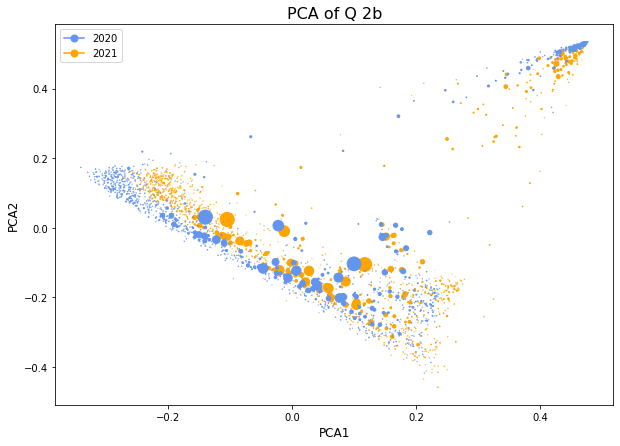

In [ ]:
df_parties_trans = normalized_data.transpose()
our_pca = PCA(n_components = 2) # 2 as needed or 13?
x_pca = our_pca.fit_transform(df_parties_trans.T) 

relevant_components = [x_pca[:,0],x_pca[:,1]]


ratio = (df_merged['בזב']/max(df_merged['בזב']))*200 
normalized_data1 = pd.DataFrame.copy(normalized_data)

normalized_data1['year'] = [2021]*1211+[2020]*1211

col_vec = ["cornflowerblue", "orange"]
colors_vec= []
for i in range(len(normalized_data1)):
  if (normalized_data1['year'][i]==2020):
    colors_vec.append(col_vec[0])
  else:
    colors_vec.append(col_vec[1])

plt.figure(figsize=(10,7))
plt.title('PCA of Q 2b', fontsize= 16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.scatter(relevant_components[0], relevant_components[1], s= ratio, color= colors_vec)
label_1 = mlines.Line2D([], [], color='cornflowerblue', marker='o',markersize=7, label='2020')
label_2 = mlines.Line2D([], [], color='orange', marker='o',markersize=7, label='2021')
plt.legend(handles=[label_1,label_2])



ככלל, ניתן לראות מגמתיות של רוב מוחלט של דמיון באחוזי הצבעה על פני על המפלגות והיישובים, להוציא מספר ישובים קטן בהן חל שינוי יחסית משמעותי, אותו ניתן לראות בציר האנכי העליון בסביבת 0.4 של הניתח הראשון של ניתוח הגורמים הראשיים. כלומר, ניתן לזהות מגמתיות שינוי בהיקף ההצבעה והמפלגות שקיבלו את הקולות ביישובים קטנים יחסית, אותם ניתן לזהות על פי עיגולים קטנים בהתאם

##2C

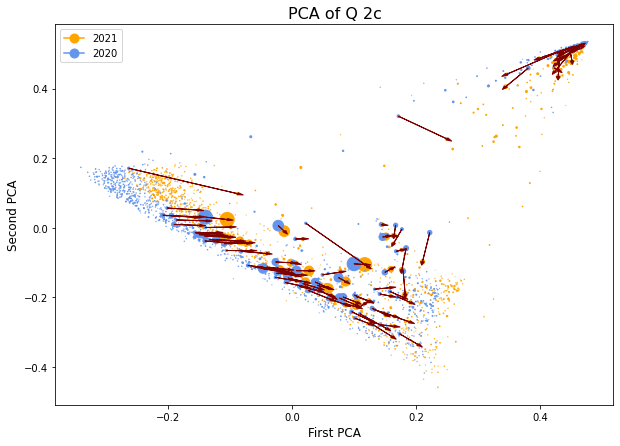

In [ ]:

plt.figure(figsize=(10,7))
plt.title('PCA of Q 2c', fontsize=16)
plt.xlabel('First PCA', fontsize=12)
plt.ylabel('Second PCA', fontsize=12)
df_parties_trans
x_pca = our_pca.fit_transform(df_parties_trans.T) 
relevant_components = [x_pca[:,0],x_pca[:,1]]
plt.scatter(relevant_components[0], relevant_components[1], s= ratio, color= colors_vec)


BZB_2020 = df_2020_raw["בזב"]
over_10K_BZB =  BZB_2020[BZB_2020 >= 10000]
index_list= over_10K_BZB.index

for i in index_list:
  p_loc = x_pca[df_parties_trans.T.index.get_loc(i)]
  x_dist = (p_loc[0][0] - p_loc[1][0])
  y_dist = (p_loc[0][1]- p_loc[1][1])
  plt.arrow(p_loc[1][0], p_loc[1][1], x_dist ,y_dist, width = 0.000001, head_width=0.006, color = 'maroon', head_length = 0.01)
  arrowprops=dict(arrowstyle='>')
  

label_1 = mlines.Line2D([], [], color='cornflowerblue', marker='o',markersize=9, label='2020') #  2020
label_2 = mlines.Line2D([], [], color='orange', marker='o',markersize=9, label='2021') # 2021

plt.legend(handles=[label_2,label_1])

plt.show()


על פי החצים בתרשים, ניתן לראות כי ישנם ישובים בהם השינוי בהצבעות בין הבחירות לא היה מהותי,כלומר הקאורדינטות במיקום מאוד קרוב ודומה. 
לצד זאת, ישנם ישובים בהם השינוי היה מהותי מאוד, הן מבחינת מספר המצביעים הכללי והן מבחינת המפלגות אליהן הצביע,את זה ניתן לראות באורכם של מספר חצים.
 מרבית החצים קטנים, אך עם זאת ישנם לא מעט חצים הנראים ארוכים, משמע ישנם לא מעט ישובים בהם התחרשו שינויים משמעותיים במספר המצביעים לכל מפלגה. 

##2D

,square dist,name
780,1.009091,נווה
141,0.667415,ביר הדאג
704,0.623461,מסעודין אלעזאזמה


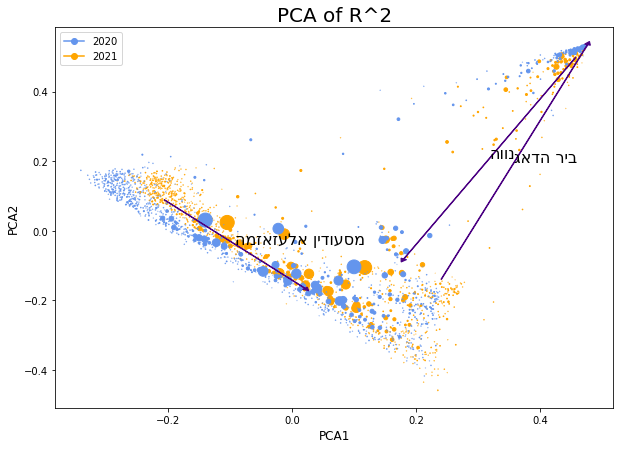

In [ ]:
df_merged_sort = pd.DataFrame.copy(normalized_data)
df_merged_sort = df_merged_sort.sort_index(axis = 0)

our_range = range(0,2421)
our_range
df_3_cities = []

for i in our_range:
  if i%2 == 1:
    continue
  else:
    df_3_cities.append((df_merged_sort.iloc[i]-df_merged_sort.iloc[i+1]))
    df_3_cities.append((df_merged_sort.iloc[i]-df_merged_sort.iloc[i+1]))


df_3_cities = np.power(df_3_cities, 2)
square_dist = df_3_cities.sum(axis=1)

df_merged_sort['square dist'] = square_dist

df_merged_sort.sort_values(by=['square dist'], ascending=False).head(6)
 #ascending=False)


cities_list = df_merged_sort.index

df_merged_sort['name'] = cities_list
df_merged_sort
test = df_merged_sort.drop_duplicates(subset= "name")
#test

df_3_cities_2 = test.iloc[: , -2:]
df_3_cities_2 = df_3_cities_2.reset_index(drop= True)

s = df_3_cities_2.sort_values(['square dist'], ascending=False)
display(s.head(3))

index_max_dist = [780, 141, 740]
names_max_dist= ['נווה', 'ביר הדאג', 'מסעודין אלעזאזמה']

plt.figure(figsize=(10,7))
plt.title('PCA of R^2', fontsize=20)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.scatter(relevant_components[0], relevant_components[1], s= ratio, color= colors_vec)

for i in range(len(df_3_cities_2)):
  for j in range(3):
    if i == index_max_dist[j]:
      d_x1 = x_pca[i+1211,0] - x_pca[i,0] 
      d_y1 = x_pca[i+1211,1] - x_pca[i,1]
      plt.arrow(x_pca[i,0],x_pca[i,1],d_x1,d_y1, head_width = 0.01, color= 'indigo', head_length = 0.01)
      plt.annotate(names_max_dist[j][::-1],xy=((x_pca[i+1211,0]+ x_pca[i,0])/2,(x_pca[i+1211,1]+ x_pca[i,1])/2),fontsize=16)

label_1 = mlines.Line2D([], [], color='cornflowerblue', marker='o',markersize=6, label='2020')
label_2 = mlines.Line2D([], [], color='orange', marker='o',markersize=6, label='2021')
plt.legend(handles=[label_1,label_2])
plt.show()


In [ ]:
df2020 = pd.DataFrame(mani_2.iloc[:,0:13],index=['נווה', 'ביר הדאג', 'מסעודין אלעזאזמה'])
df2021 = pd.DataFrame(df_2021_new.iloc[:,0:13],index=['נווה', 'ביר הדאג', 'מסעודין אלעזאזמה'])


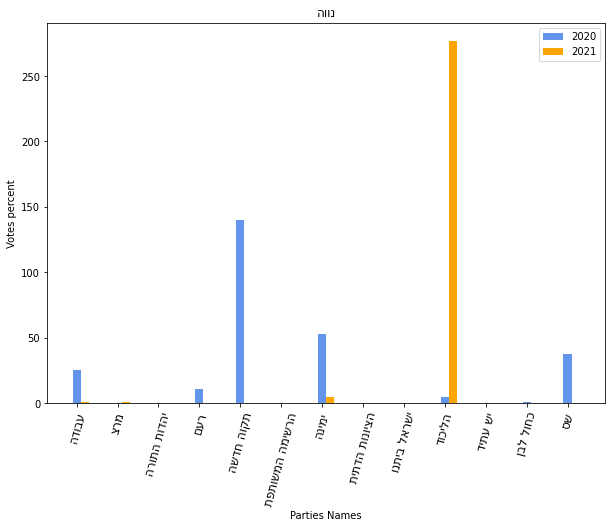

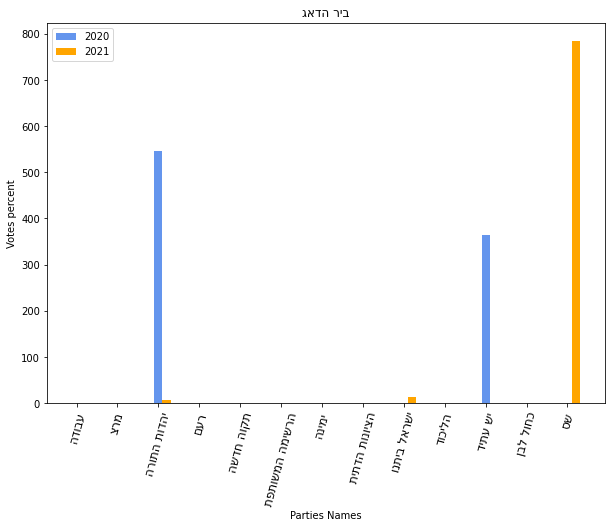

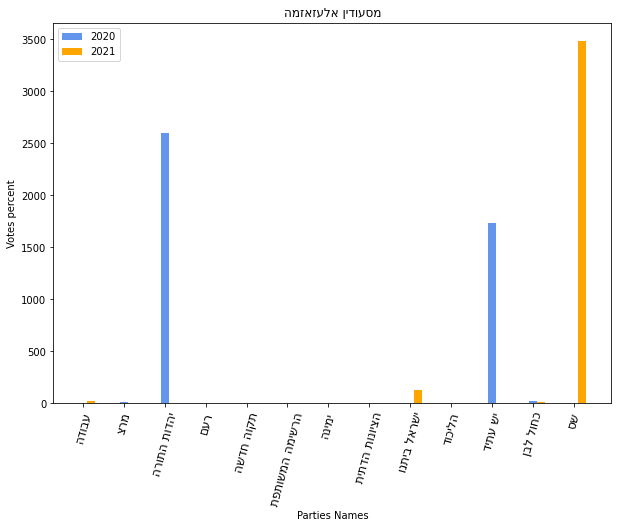

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f756a5f10>)

In [ ]:
def bar_of_top_3_max_dist(value1, value2, title):
    width = 0.2  # set column width 
    #names = []  
    #names_vec=[]
    #parties_names = [parties_dict_2021[i] for i in name_vec][::]
    rev_names = [name[::-1] for name in list(parties)] 
    fig, ax = plt.subplots(figsize=(10,7)) 

    n = len(value2)
    bar_2020 = ax.bar(np.arange(n), list(value1), width, color='cornflowerblue')
    bar_2021 = ax.bar(np.arange(n) + width, list(value2), width, color='orange')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation=75, size= 12)
    ax.set_title(title)
    ax.legend(['2020','2021'])
    plt.show()

    return fig, ax

bar_of_top_3_max_dist(df2020.iloc[0,:],df2021.iloc[0,:], title = df2021.index[0][::-1])
bar_of_top_3_max_dist(df2020.iloc[1,:],df2021.iloc[1,:], title = df2021.index[1][::-1])
bar_of_top_3_max_dist(df2020.iloc[2,:],df2021.iloc[2,:], title = df2021.index[2][::-1])

ניתן לראות כי בשלושת ישובים אלו היו הבדלים חדים בין מערכות הבחירות:

עבור הישוב 'נווה' ניתן לראות שהייתה עליה גורפת בהצבעות למפלגת הליכוד וירידה בהצבעות למפלגת ימינה. כמו כן, בשנת 2021 מלבד לליכוד ולימינה לא הצביעו כלל למפלגות להן הצביעו בשנת 2020.

עבור היישוב 'ביר הדאג' ניתן לראות שינוי בהצבעות למפלגת שס לעומת 0 הצבעות בשנה הקודמת ולעומת זאת ירידה מוחלטת בהצבעות ליש עתיד וירידה חדה מאוד בהצבעות ליהדות התורה.

בישוב 'מסעודין אלעזאזמה' אנחנו רואים מגמה דומה לישוב ביר הדאג. כמות הצבעות גדולה מאוד לשס לעומת 0 הצבעות בשנה הקודמת וירידה מוחלטת בהצבעות ליש עתיד ויהדות התורה. בנוסף יש קצת הצבעות למפלגות חדשות ב-2021 כמו העבודה וישראל ביתנו עם כמות הצבעות מינורית.

חשוב לציין כי התוצאות נראות לא הגיונית במידה עם הכרות של המפה הפוליטית אל מול הישובים הערבים / בדואים, אך גם בדיקה ידנית של הנתונים מציגה את ההצבעות למפלגת ש"ס בישובים אלו - מגמה מעניינת!